<a href="https://colab.research.google.com/github/pq2312/The-Android-App-Market-on-Google-Play/blob/main/The_Android_App_Market_on_Google_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I. EXECUTIVE SUMMARY**

[UNDER CONSTRUCTION]

Data source: [Github](https://github.com/duncandam86/DataCamp-Projects/blob/master/TV%2C%20Halftime%20Shows%2C%20and%20the%20Big%20Game/datasets/super_bowls.csv) and [Datacamp](https://projects.datacamp.com/projects/619)

**II. ANALYSIS**

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Read in dataset
apps_with_duplicates = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/Android/apps.csv')

In [4]:
# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

In [5]:
# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

Total number of apps in the dataset =  9659


In [6]:
# Have a look at a random sample of 5 rows
apps.sample(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8082,9202,TNEB Quick Pay Easy,FINANCE,4.5,28,1.4M,"10,000+",Free,0,Teen,Finance,"January 29, 2018",1,3.0 and up
3765,4683,"Vault-Hide SMS,Pics & Videos,App Lock,Cloud ba...",BUSINESS,4.5,984451,NaN,"50,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
7935,9054,Bubble Shooter DX AdFree,FAMILY,NaN,1,2.1M,50+,Paid,$2.99,Everyone,Casual,"May 31, 2016",1.02,2.3 and up
4600,5571,Summer Camp Island AR,FAMILY,3.6,740,71M,"50,000+",Free,0,Everyone,Simulation,"July 5, 2018",1.0.2,4.4 and up
2370,3033,Golfshot: Golf GPS + Tee Times,SPORTS,4.3,7543,25M,"500,000+",Free,0,Everyone,Sports,"July 11, 2018",1.31.0,4.1 and up


In [7]:
# List of characters to remove
chars_to_remove = ['+',',','$']

In [8]:
# List of column names to clean
cols_to_clean = ['Installs','Price']

In [9]:
# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))


In [10]:
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB
None


In [11]:
# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

In [12]:
# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

In [13]:
# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   float64
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB
None


**1. Exploring app categories**

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

*   Which category has the highest share of (active) apps in the market?
*   Is any specific category dominating the market?
*   Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [14]:
# Print list of unique categories
num_categories = apps.Category.unique()
print('List of categories = ', num_categories)

List of categories =  ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [15]:
# Print the total number of unique categories
print('List of categories = ', len(num_categories))

List of categories =  33


In [16]:
# Count the number of apps in each 'Category'.
num_apps_in_category = apps.Category.value_counts().reset_index()
num_apps_in_category.head()

,index,Category
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


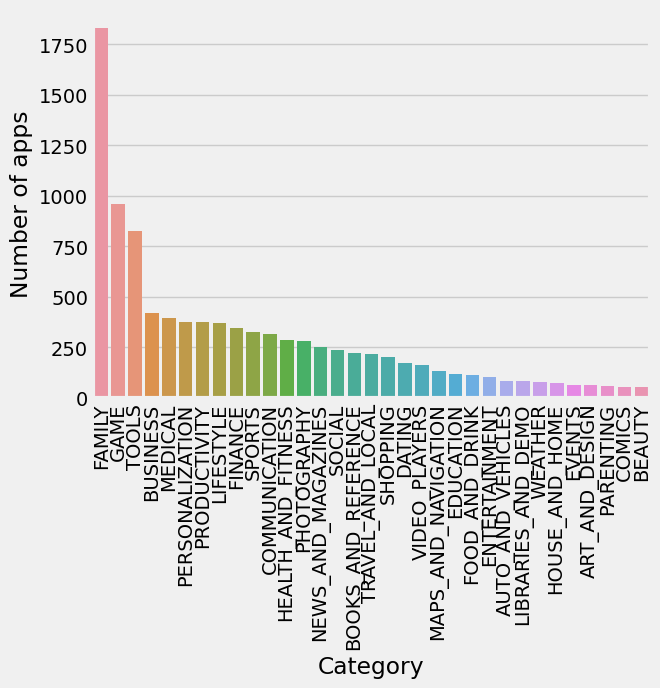

In [23]:
figure1 = sns.barplot(y = 'Category', x = 'index', data = num_apps_in_category);
figure1.set(xlabel='Category',ylabel='Number of apps')
plt.xticks(rotation=90);


**2. Distribution of app ratings**

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [18]:
# Average rating of apps
avg_app_rating = apps.Rating.mean()
print('Average app rating = ', avg_app_rating)


Average app rating =  4.173243045387994


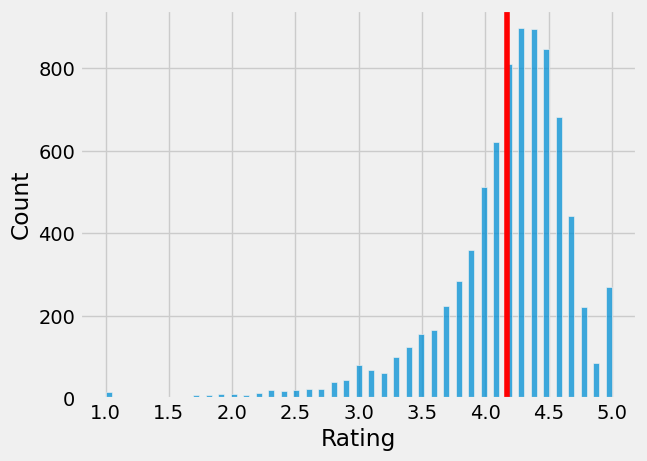

In [39]:
# Distribution of apps according to their ratings
sns.histplot(data=apps, x='Rating');
# Vertical red line to indicate the average app rating
plt.axvline(apps.Rating.mean(),0,1,color='r');


**3. Size and price of an app**

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

*   Does the size of an app affect its rating?
*   Do users really care about system-heavy apps or do they prefer light-weighted apps?
*   Does the price of an app affect its rating?
*   Do users always prefer free apps over paid apps?

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

In [47]:
# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

In [50]:
# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

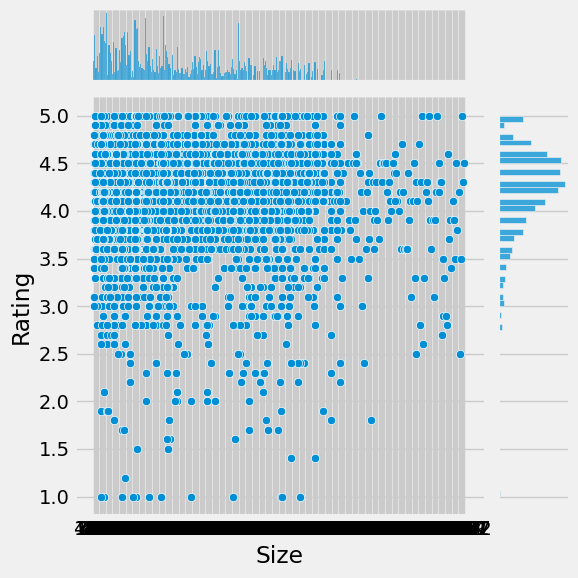

In [54]:
# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating']);


In [56]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']


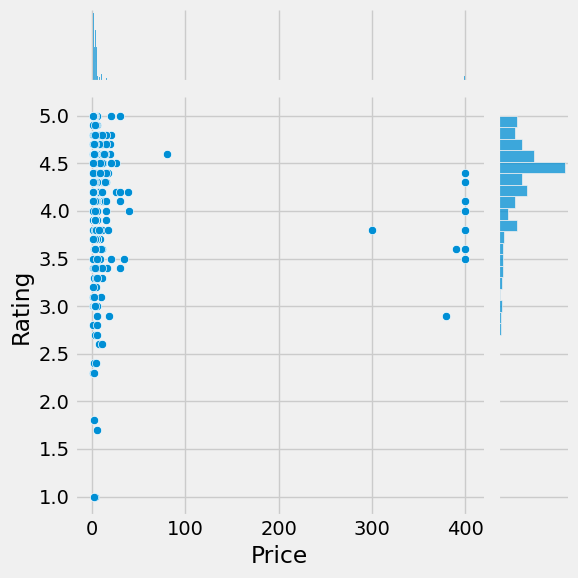

In [57]:
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

**4. Relation between app category and app price**

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

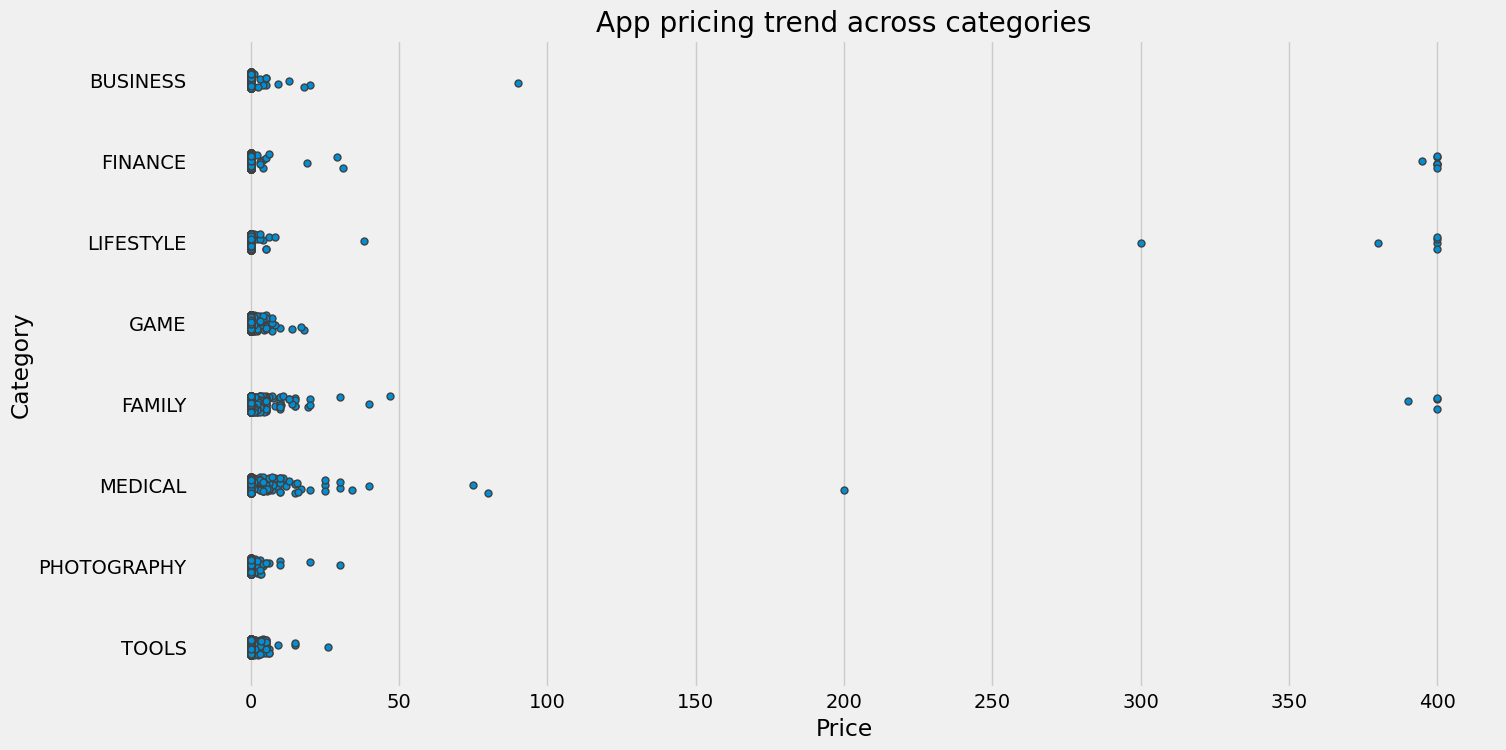

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1);
ax.set_title('App pricing trend across categories');

In [62]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


**5. Filter out "junk" apps**

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

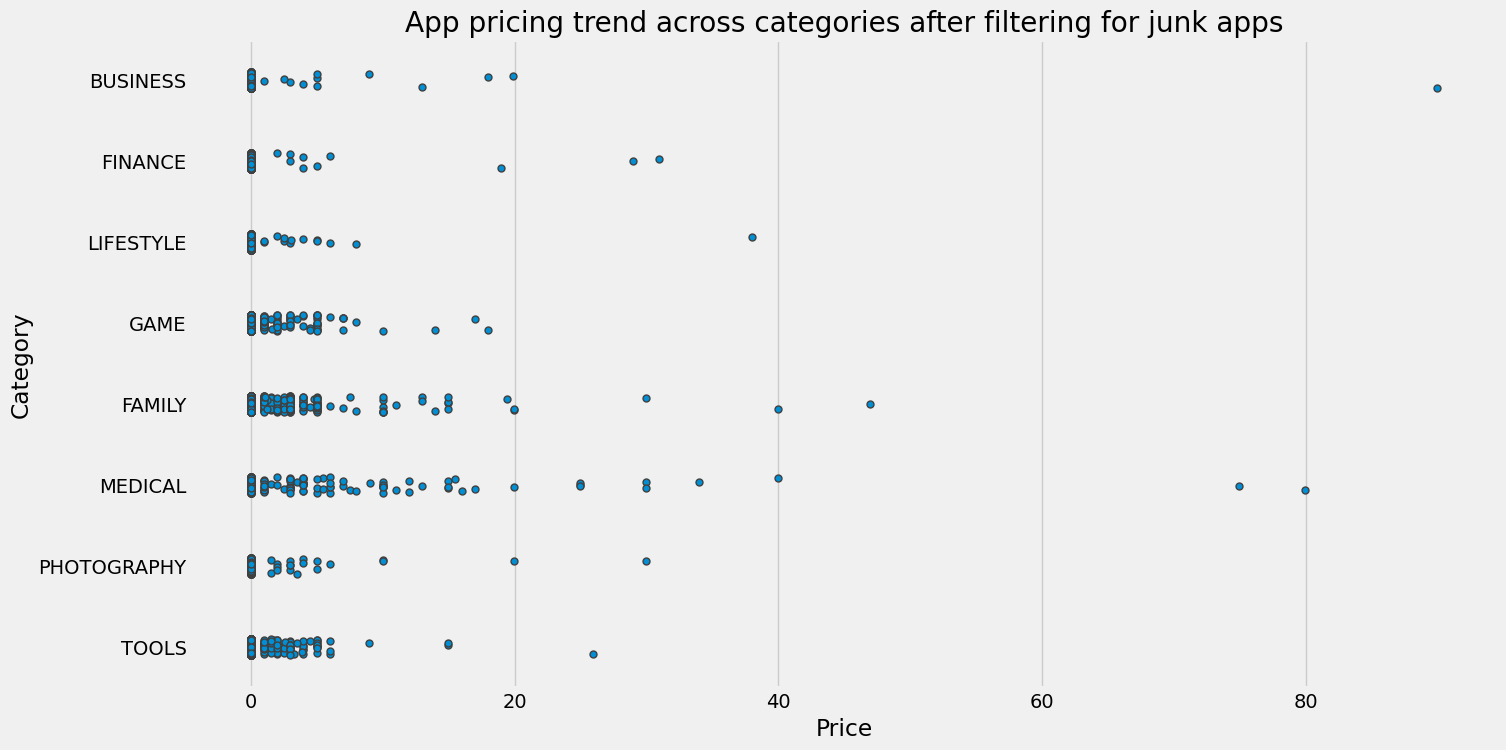

In [64]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1);
ax.set_title('App pricing trend across categories after filtering for junk apps');

**6. Popularity of paid apps vs free apps**

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

*   Free to download.
*   Main source of income often comes from advertisements.
*   Often created by companies that have other products and the app serves as an extension of those products.
*   Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

*   Users are asked to pay once for the app to download and use it.
*   The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected

In [89]:
y0 = apps[apps['Type'] == 'Paid']['Installs']
y1 = apps[apps['Type'] == 'Free']['Installs']
data1 = pd.DataFrame({'Paid' : y0, 'Free' : y1})
print(data1)

      Paid        Free
0      NaN     10000.0
1      NaN    500000.0
2      NaN   5000000.0
3      NaN  50000000.0
4      NaN    100000.0
...    ...         ...
9654   NaN      5000.0
9655   NaN       100.0
9656   NaN      1000.0
9657   NaN      1000.0
9658   NaN  10000000.0

[9658 rows x 2 columns]


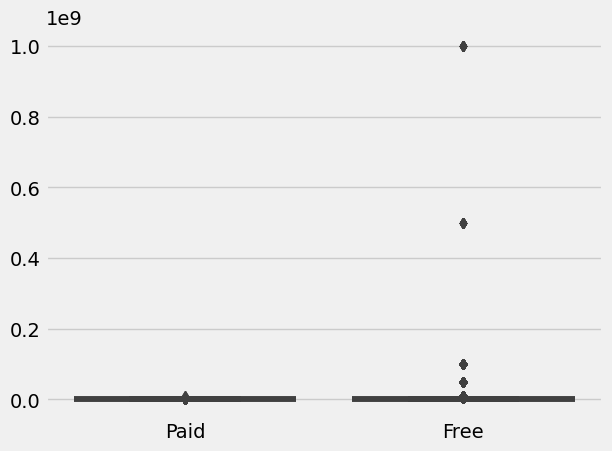

In [96]:
sns.boxplot(data = data1);

In [85]:
data = [y0,y1]
print(data)

[233     100000.0
234     100000.0
372     100000.0
406      10000.0
407       1000.0
          ...   
9555       100.0
9579      1000.0
9600     10000.0
9603     10000.0
9616        50.0
Name: Installs, Length: 756, dtype: float64, 0          10000.0
1         500000.0
2        5000000.0
3       50000000.0
4         100000.0
           ...    
9654        5000.0
9655         100.0
9656        1000.0
9657        1000.0
9658    10000000.0
Name: Installs, Length: 8902, dtype: float64]


<Axes: >

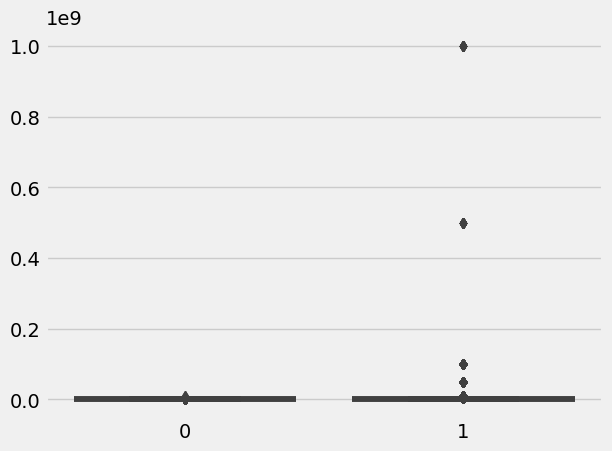

In [87]:
sns.boxplot(data)